In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

In [57]:
N_shuffle = 14
N_generation = 14
q_vals = [0.1, 0.3, 0.5, 0.7, 0.9]
N_q = len(q_vals)

q_batches = [40, -37, 9.9, -22, -9.8]
q_sgds = np.zeros((N_q,N_shuffle))
for i in range(N_q):
    q_sgds[i] = np.random.normal( q_batches[i], 2, N_shuffle)
q_sgds

array([[ 40.19219405,  37.75684175,  41.5566765 ,  43.40891906,
         44.26294884,  44.88946714,  41.47974646,  40.85915778,
         43.0554444 ,  37.7372088 ,  40.12500407,  41.43206457,
         41.26761351,  40.33681471],
       [-37.30666127, -33.18808466, -34.86003535, -35.22867786,
        -40.05014987, -35.65027582, -37.6282979 , -37.19862944,
        -40.86142732, -33.81148783, -35.07768766, -37.74024193,
        -39.84477814, -36.09764332],
       [  7.33092798,  11.61110641,  11.86515254,  10.61100628,
          7.44966444,  11.51273062,   9.3341914 ,   7.41129583,
          8.14260671,   9.20554042,  12.47353233,   9.92635171,
          7.57609617,  11.96147078],
       [-19.98046725, -23.53551888, -25.36841605, -22.34029314,
        -24.0109604 , -21.2137383 , -22.93162158, -19.75179753,
        -17.90142251, -21.77898632, -22.7006332 , -18.37822551,
        -23.89746713, -22.11273276],
       [ -8.9123273 , -10.02255738, -12.79733131,  -7.62510991,
        -10.08566057

In [78]:
c_Norm = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=c_Norm, cmap=plt.get_cmap('gist_rainbow'))
styles = ['-', '--']
names = ['-q batch', '-q sgd']

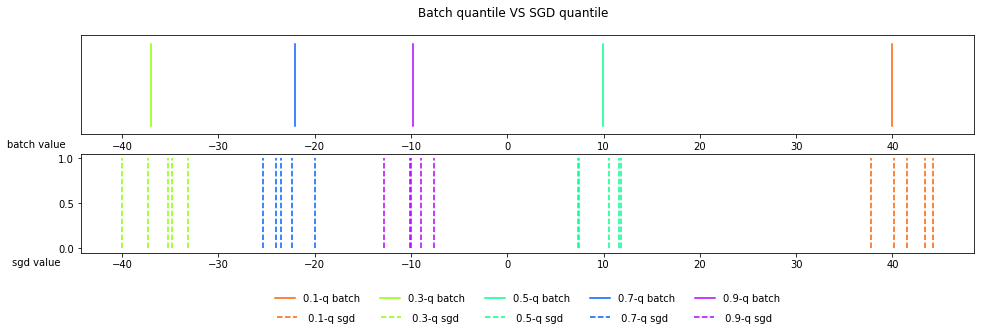

In [79]:
def plot_quantiles(q_vals, q_batches, q_sgds):

    fig = plt.figure(figsize=(16,4))
    ax_batch = fig.add_subplot(211)
    ax_sgd = fig.add_subplot(212, sharex = ax_batch)
    fig.suptitle('Batch quantile VS SGD quantile')
    
    for idx in range(N_q):
        colorVal = scalarMap.to_rgba(q_vals[idx])
        qb = q_batches[idx]

        ax_batch.plot([qb,qb], [0,1], styles[0], label= str(q_vals[idx])+names[0], color=colorVal)

        for i in range(q_sgds.shape[0]):
            qs = q_sgds[idx][i]
            if (i==0): 
                ax_sgd.plot([qs,qs], [0,1], styles[1], label=' '+str(+q_vals[idx])+names[1]+'  ', color=colorVal)
            else: 
                ax_sgd.plot([qs,qs], [0,1], styles[1], color=colorVal)

    #set
    ax_batch.set_xlabel('batch value')
    ax_batch.xaxis.set_label_coords(-0.05, -0.05)
    ax_batch.set_ylim([-0.1,1.1])
    ax_batch.set_yticks([])

    plt.locator_params(axis='x', nbins=10)

    ax_sgd.set_xlabel('sgd value')
    ax_sgd.xaxis.set_label_coords(-0.05, -0.05)

    # set position of legend
    ax_batch.legend(loc='lower center', bbox_to_anchor=(0.5, -1.8),
            frameon=False, ncol=len(q_vals))
    ax_sgd.legend(loc='lower center', bbox_to_anchor=(0.5, -0.8),
        frameon=False, ncol=len(q_vals))
        
    return fig
                    
fig = plot_quantiles(q_vals, q_batches, q_sgds)


In [80]:
def generate_mtx():
    mtx = np.zeros((N_q, N_generation, N_shuffle))
    for q_idx in range(N_q):
        # each generation:
        mtx_q = mtx[q_idx]
        for gen_idx in range(N_generation):
            # each shuffle:
            mtx_q[gen_idx] = np.random.normal(q_batches[q_idx], 5, N_shuffle)
    return mtx

q_batches_lst = np.zeros((N_q,N_generation))
for i in range(N_q):
    q_batches_lst[i] = np.random.normal(q_batches[i], 2, N_generation)

q_sgds_lst = generate_mtx()

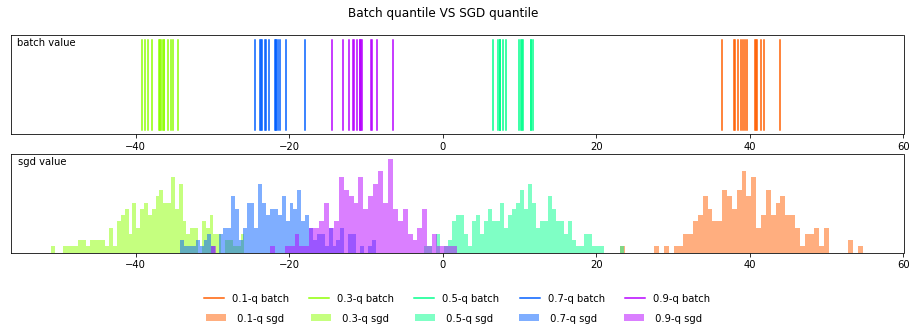

In [81]:
def plot_quantiles(q_vals, q_batches_lst, q_sgds_lst):

    fig = plt.figure(figsize=(16,4))
    ax_batch = fig.add_subplot(211)
    ax_sgd = fig.add_subplot(212, sharex = ax_batch)
    fig.suptitle('Batch quantile VS SGD quantile')
    bins = 50
    
    for q_idx in range(N_q):
        colorVal = scalarMap.to_rgba(q_vals[q_idx])
        for gen_idx in range(N_generation):
            qb = q_batches_lst[q_idx][gen_idx]
            if gen_idx==0:
                ax_batch.plot([qb,qb], [0,1], styles[0], label= str(q_vals[q_idx])+names[0], color=colorVal)
            else:
                ax_batch.plot([qb,qb], [0,1], styles[0], color=colorVal)
        
        mtx_q = q_sgds_lst[q_idx].reshape(-1)
        ax_sgd.hist(mtx_q, bins, alpha=0.5, label = ' '+str(q_vals[q_idx])+names[1]+'  ', color=colorVal)
        

    #set
    ax_batch.set_xlabel('batch value')
    ax_batch.xaxis.set_label_coords(0.04, 0.98)
#     ax_batch.set_ylim([-0.1,1.1])
    ax_batch.set_yticks([])

    plt.locator_params(axis='x', nbins=10)

    ax_sgd.set_xlabel('sgd value')
    ax_sgd.xaxis.set_label_coords(0.035, 0.98)
    ax_sgd.set_yticks([])


    # set position of legend
    ax_batch.legend(loc='lower center', bbox_to_anchor=(0.5, -1.8),
            frameon=False, ncol=len(q_vals))
    ax_sgd.legend(loc='lower center', bbox_to_anchor=(0.5, -0.8),
        frameon=False, ncol=len(q_vals))
        
    return fig
                    
fig = plot_quantiles(q_vals, q_batches_lst, q_sgds_lst)